<a href="https://colab.research.google.com/github/Twilight1029/Python-for-Data-Analysis/blob/main/Python_for_Data_Analysis_CH9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 9 Plotting and Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
data = np.arange(10)

In [ ]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

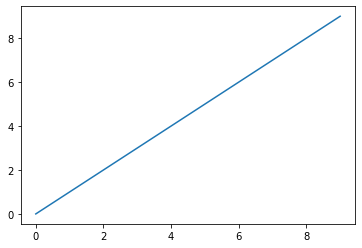

In [ ]:
plt.plot(data)

#### Figure and Subplots
* Plots in matplotlib reside within a Figure object
* Creating a new figure
* plt.figure() has a number of options, notably,
* figsize will guarantee the figure has a certain size and aspect ratio
* In jupyter notebook plots are reset after each cell is evaluated
* matplot draws on the last figure and subplot used(creating one if necessary)
* The objects returned by fig.add_subplot here are AxesSubplot objects, on which you can directly plot on the other empty subplots by calling each one's instance method

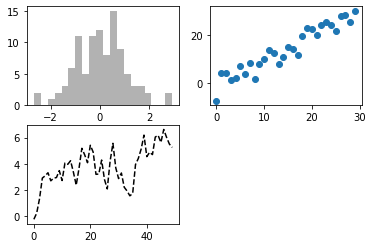

In [ ]:
fig = plt.figure()
# figure should be 2*2, and we are selecting the 1st plot
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# 'k--' is a style option for matplotlib to plot a black dashed line
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

#### matplotlib includes a convenience method, *plt.subplots* ,that creates a new figure and retunrs a NumPy array containing the created subplot objects

* The axes array be be easily indexed like two-dimensional array
You can alsoe indicate that subplots should have the same x- or y- axis using sharex and sharey

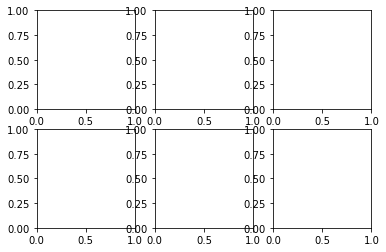

In [ ]:
fig, axes = plt.subplots(2, 3)

In [ ]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Adjusting the spacing around subplots<br>
You can change the spacing using the **subplots_adjust** method on Figure objects, also availiable as a top-level function<br>
**wspace** and **hspace** controls the percent the figure width and figure height, respectively, to use as spacing betweeen subplots<br>

In [ ]:
subplots_adjust(left = None, bottom = None, right = None, top = None,
               wspace = None, hspace = None)

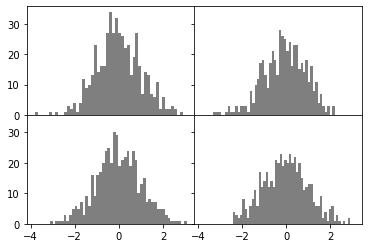

In [ ]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins = 50, color = 'k',
                       alpha = 0.5)
plt.subplots_adjust(wspace = 0, hspace = 0)

#### Colors, Markers, and Line Styles
Matplotlib's main plot function accepts arrays of x and y corordinates and optionally a string abbreviation indicating color and line style.<br>
You can use any color on the spectrum by specifying its code.

In [ ]:
ax.plot(x, y, 'g--') # plot x versus y with green dashes

In [ ]:
ax.plot(x, y, linestyle = '--', color = 'g')

Creating **markers** to highlight the actual data point

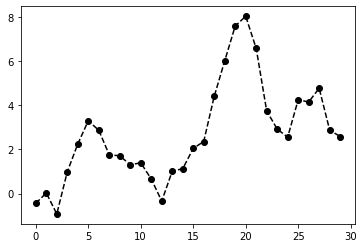

In [ ]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

Could be written more explicitly as

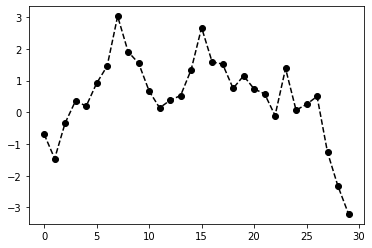

In [ ]:
plt.plot(np.random.randn(30).cumsum(), color = 'k', 
         linestyle = 'dashed',marker = 'o'
        )

For line plots, subsequent points are linearly interpolated by default<br>
To alter, use the **drawstyle** option

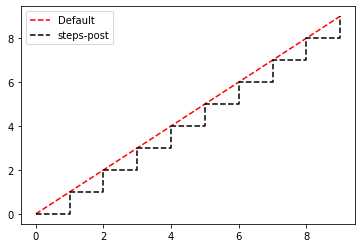

In [ ]:
plt.plot(data, 'k--', color = 'r', label = 'Default')
plt.plot(data, 'k--', drawstyle = 'steps-post', label = 'steps-post')
plt.legend(loc = 'best')

#### Ticks, Labels, and Legends
pyplot Interface control the **plot range, tick locations, and tick labels**, respectively. They can be used in two ways<br>

* Called with no arguments returns the current parameter value
* Called with parameters sets the parameter value<br>
All such methods act on the active most recently created **AxesSubplot**<br>
Each of them corresponds to two methods on the subplot object itsef:
* In the case of xlim these are **ax.get_xlim** and **ax.set_xlim**


Setting the title, axis labels, ticks, and ticklabels
* Change the x-axis ticks, use **set_xticks** and **set x_xticklabels**


Text(0.5, 0, 'Stages')

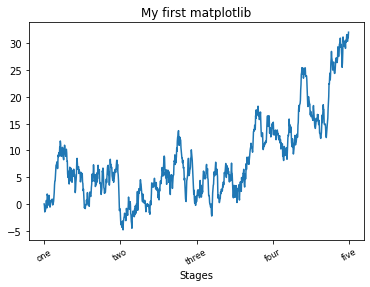

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
# place the ticks along the data range, by default they will be labels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# rotation sets the x tick labels at a 30-degree rotation
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation = 30, fontsize = 'small')
# set subplot title
ax.set_title('My first matplotlib') 
ax.set_xlabel('Stages')

Axes class has a set method that allows batch setting of plot properties

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

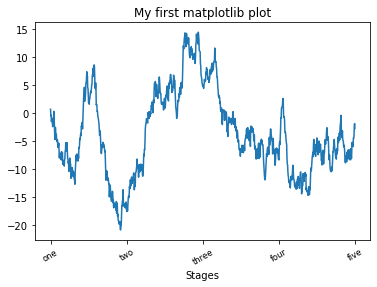

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
# rotation sets the x tick labels at a 30-degree rotation
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation = 30, fontsize = 'small')
# set subplot title
props = {'title': 'My first matplotlib plot', 'xlabel': 'Stages'}
ax.set(**props)

### Adding legends
Pass the label argument when adding each piece of the plot<br>
Call the **ax.legend()/plt.legend()** to automatically create a legend **loc** tells matplotlib where to place the plot

In [ ]:
from numpy.random import randn

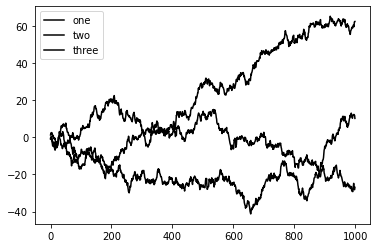

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label = 'one')
ax.plot(randn(1000).cumsum(), 'k', label = 'two')
ax.plot(randn(1000).cumsum(), 'k', label = 'three')
ax.legend(loc = 'best')

#### Annotations and Drawing on a Subject
* Add anotations and text using the **text, arrow**, and **annotate** function<br>
* text draws text at a given coordinates (x,y) on the plot with optional custom styling<br>
* Annotations can draw both text and arrows arranged appropriate<br>
* **ax.annotate** method can draw labels at the indicated x and y coordinate

In [ ]:
ax.text(x, y, 'Hello World!', family = 'moonspace', fontsize = 10)

In [ ]:
data['SPX']

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

In [ ]:
spx = data['SPX']
spx.asof('10/10/2011')

1194.89

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

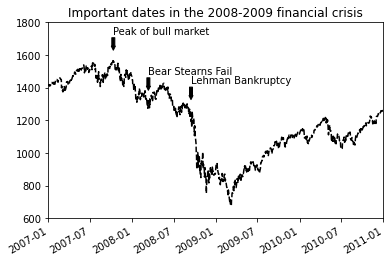

In [ ]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('pydata-book/examples/spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']

spx.plot(ax = ax, style = 'k--')

# mark the data with anotation
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fail'),
    (datetime(2008, 9, 14), 'Lehman Bankruptcy' )
]

# asof() is used to get the last rows before where
for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date) + 75),
               xytext = (date, spx.asof(date) + 225),
               arrowprops = dict(facecolor = 'black', headwidth = 4,
                                width = 3, headlength = 4),
               horizontalalignment = 'left', verticalalignment = 'top')

# zoom in on 2007-2010, manually set the start and end boundaries for the plot
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

#### Drawing shapes
* matplotlib has objects that represent many shapes, referred to as **patches**
* To add a shape to a plot, you create the patch object shp and add it to a subplot by calling **ax.add_patch(shp)**

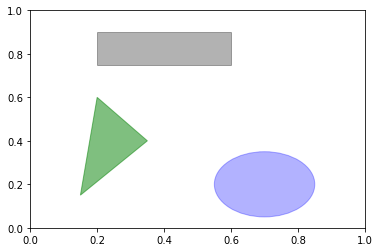

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color = 'k', alpha = 0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color = 'b', alpha = 0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color = 'g',
                   alpha = 0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#### Saving Plots on File
* You can save the active figure to file using **plt.savefig**<br>
* Or call the figure object's **savefig** instsance method
* The file type is inferred from the **file extension**
* **dpi** controls the dots-per-inch resolution
* **bbox_inches** can trim the white space around the actual figure
* **savefig** can also write to any file-like object

In [ ]:
plt.savefig('figpath.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
# get a plot as png with minimal whitespace and 400 DPI(Dots Per Inch)
plt.savefig('figpath.png', dpi = 400, bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

## 9.2 Plotting with pandas and seaborn

#### Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics

### Line plots
* Series and DataFrame each have a plot attribute for making some basic plot types

<AxesSubplot:>

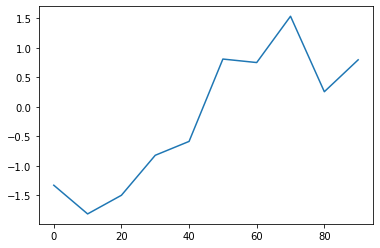

In [ ]:
s = pd.Series(np.random.randn(10).cumsum(), 
              index = np.arange(0, 100, 10))
s.plot()

The Series object's index is passed to matplotlib for plotting on the x_axis, can be diabled by **use_index = False**

<AxesSubplot:>

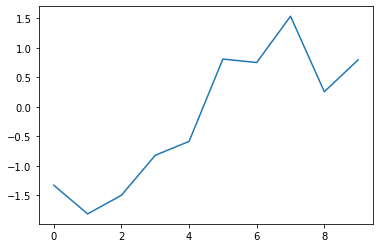

In [ ]:
s.plot(use_index=False)

* Most of panda's plotting methods accept an **optional ax parameter**, which can be a matplotlib subplot object
* DataFrame's **plot method** plots each of its columns as a different line on the same subplot, creating a legend automatically
* Additional **keyword arguments** to plot are passed through the respective matplotlib plotting function

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), 
                columns = ['A', 'B', 'C', 'D'], 
                index = np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.325740,-0.670218,0.110562,0.937078
10,-0.348005,-1.233665,0.432506,-1.175962
20,0.452313,-0.500046,-0.019267,-1.022500
30,0.743237,0.596348,0.513520,-1.021407
40,1.769486,2.537651,3.072042,-1.144886
50,1.982679,2.214536,3.667700,-2.414394
60,2.781023,1.451122,1.766493,-3.434902
70,3.103816,0.594636,1.408265,-3.190057
80,2.027593,-1.262129,0.302661,-3.907047
90,2.629152,-1.310533,2.684439,-5.159089


<AxesSubplot:>

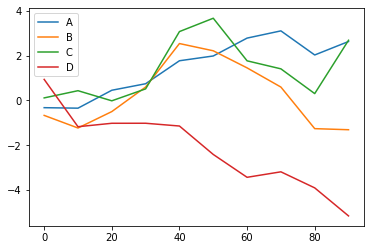

In [ ]:
df.plot()

#### Bar Plots
**plot.bar()** and **plot.barh()** make vertical and horizontal bar plots
* The Series of DataFrame index will be used as the x(bar) or y(bar) ticks

In [ ]:
data = pd.DataFrame(np.random.randn(16), 
                   index = list('abcdefghijklmnop'))
data

,0
a,0.681126
b,0.708279
c,-0.733965
d,0.374847
e,-0.114707
f,-0.064030
g,-0.078263
h,-0.034207
i,0.242358
j,1.154807


<AxesSubplot:>

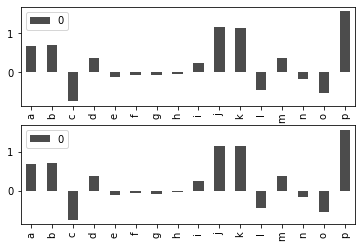

In [ ]:
fig, axes = plt.subplots(2, 1)
# color = 'k' sets the plot to black, alpha sets the transparency
data.plot.bar(ax = axes[0], color = 'k', alpha = 0.7)
data.plot.bar(ax = axes[1], color = 'k', alpha = 0.7)

with a DataFrame, bar plots group the values in each row toghether in a group in bars, side by side, for each value

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4),
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))
#The name "Genus" on the DataFrame's columns is used to title the legend
df

Genus,A,B,C,D
one,0.555280,-0.313352,-0.608184,-1.039415
two,-0.549701,-0.193549,-0.589497,0.136155
three,0.410899,1.071871,0.836618,-0.370082
four,1.484236,1.334285,0.499646,0.410569
five,-1.281835,1.603222,-2.055907,0.216134
six,-0.003879,0.063679,1.606619,-1.206551


<AxesSubplot:>

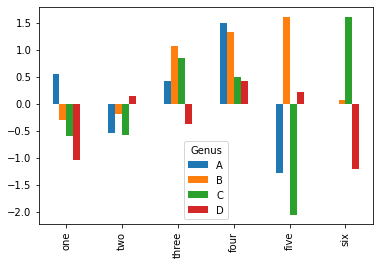

In [ ]:
df.plot.bar()

we can create a stacked bar plots from a DataFrame by passing **stacked = True**

<AxesSubplot:>

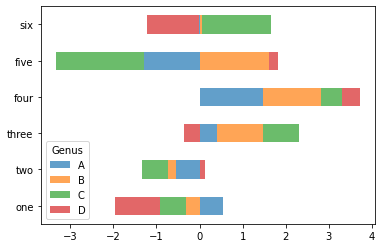

In [ ]:
df.plot.barh(stacked = True, alpha = 0.7)

#### Restaurant Tipping Example<Br>
create a stacked bar plot showing the percentage of data points for each party size on each day

In [ ]:
tips = pd.read_csv("pydata-book/examples/tips.csv")

In [ ]:
tips.head(2)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3


In [ ]:
# compute a simple cross tabulation of two factors
# by default computes a frequency table of the factors unless 
# an array of values and an aggregation function are passed
party_counts = pd.crosstab(tips['day'], tips['size'])

In [ ]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [ ]:
party_counts = pd.crosstab(tips['size'], tips['day'])
party_counts

day,Fri,Sat,Sun,Thur
size,,,,
1,1,2,0,1
2,16,53,39,48
3,1,18,15,4
4,1,13,18,5
5,0,1,3,1
6,0,0,1,3


In [ ]:
# not many 1- and 6- person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


#### Normalize so that each rows sum to 1 and make the plot

In [ ]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)

In [ ]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [ ]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

<AxesSubplot:xlabel='day'>

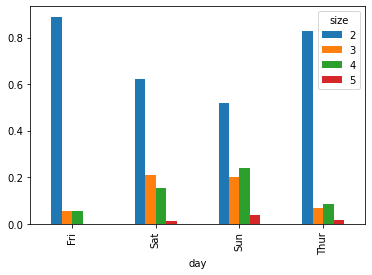

In [ ]:
party_pcts.plot.bar()

#### With data that acquires aggregation or summarization before making a plot, using seaborn package can make things much simpler

In [ ]:
import seaborn as sns
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

In [ ]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


#### Plotting functions in seaborn
* Plotting function takes a data argument, which can be a pandas DataFrame
* The other arguments refer to column names
* The black lines drawn on the bars represent the 95% confidence interval

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

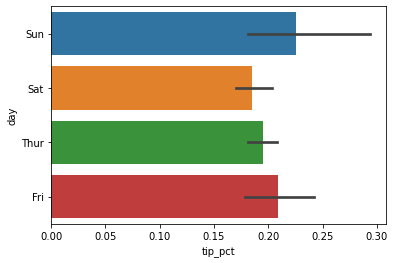

In [ ]:
sns.barplot(x = 'tip_pct', y = 'day', data = tips, orient = 'h')

sns.barplot has a hue option that enables us to split the data by an additional categorical value

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

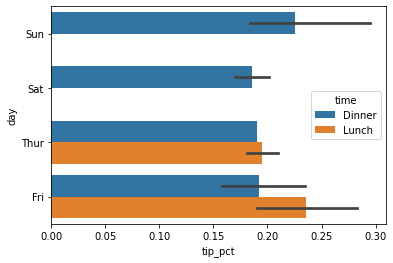

In [ ]:
sns.barplot(x = 'tip_pct', y = 'day', hue = 'time', 
            data = tips, orient = 'h')

seaborn automatically changed the aesthetics of plots, the default color palette, plot background, and grid colors<br>
Switch between different plot appearances usinhg **seaborn.set**

In [ ]:
sns.set(style = 'whitegrid')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

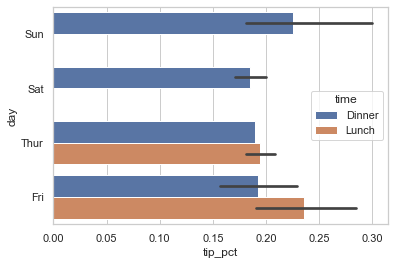

In [ ]:
sns.barplot(x = 'tip_pct', y = 'day', hue = 'time', 
            data = tips, orient = 'h')

### Histogram and Density Plots
* A histogram is a kind of bar plot that gives a discretized display of value frequency
* Points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted

<AxesSubplot:ylabel='Frequency'>

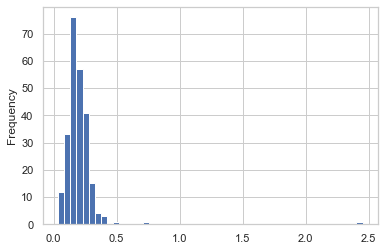

In [ ]:
tips['tip_pct'].plot.hist(bins = 50)

**Density plot**:formed by computing an estimate of a continuous probability distribution that might have generated the observed data

Usual procedure is to approximate the distribution as a mixture fo "kernels" - simpler distributions

<AxesSubplot:ylabel='Density'>

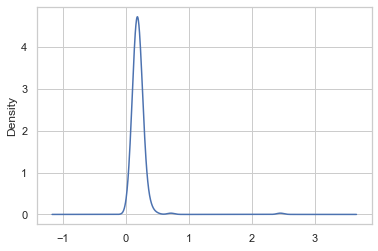

In [ ]:
tips["tip_pct"].plot.density()

**distplot**: Plot both a histogram and a continuous density estimate simultaneously

Example: a binomial distributio drawing from two different standard normal distributions

<AxesSubplot:>

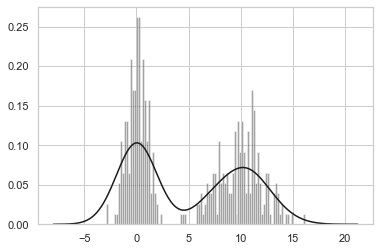

In [ ]:
comp1 = np.random.normal(0, 1, size = 200)
comp2 = np.random.normal(10, 2, size = 200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins = 100, color = 'k')

### Scatter or Point Plots
Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series

In [ ]:
macro = pd.read_csv('pydata-book/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
# compute the log difference
trans_data = np.log((data)).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


**regplot** makes a scatter plot that fits a linear regression line

Text(0.5, 1.0, 'CHang in log m1 versus log unemp')

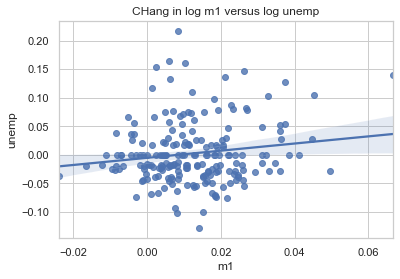

In [ ]:
sns.regplot('m1', 'unemp', data = trans_data)
plt.title('CHang in log %s versus log %s' % ('m1', 'unemp'))

**paris plot** or **scatter plot matrix**: All scatter plots among a group of variables
**pairplot**: placing histograms or density estimates of each variable along the diagonal

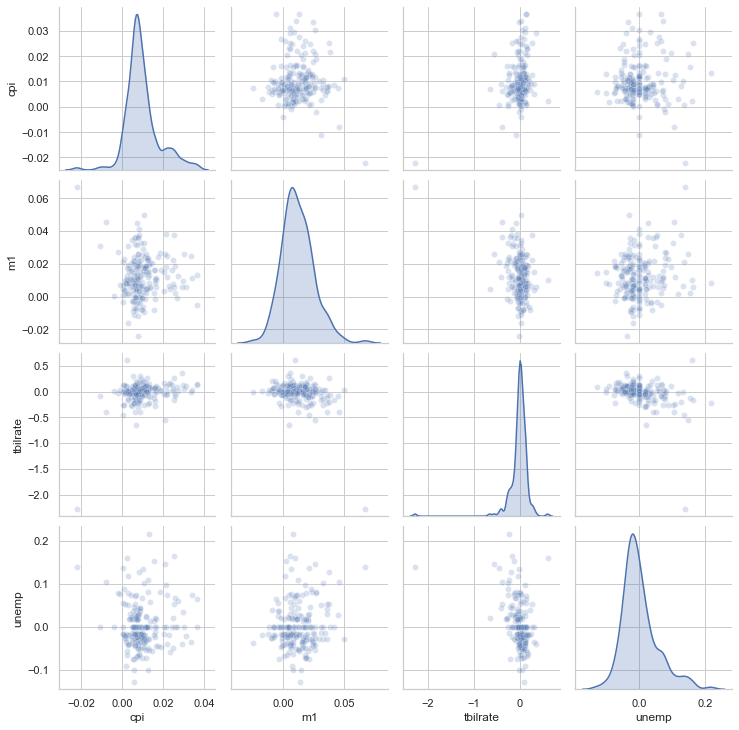

In [ ]:
# plot_kws: enables passing down configuration option
# to the individual calls on the off-diagonal elements
sns.pairplot(trans_data, diag_kind = 'kde', plot_kws = {'alpha':0.2})

### Facet Grids and Categorical Data
one way to visualize the data with many categorical variables is to use a **facegrid**<br>

seaborn has a built-in function **catplot** that simplifies making many kinds of faceted plots

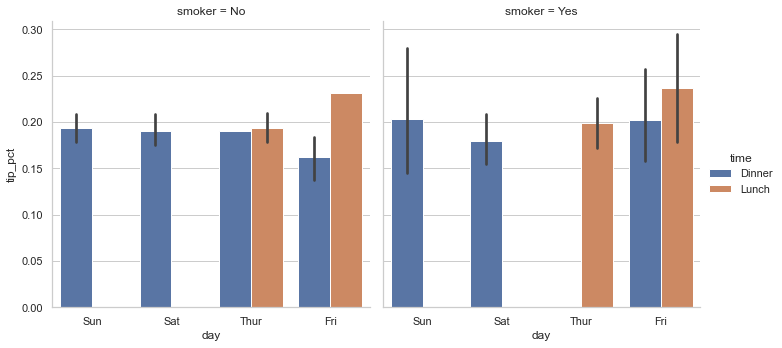

In [ ]:
sns.catplot(x = 'day', y = 'tip_pct', hue = 'time', col = 'smoker',
           kind = 'bar', data = tips[tips.tip_pct <1])

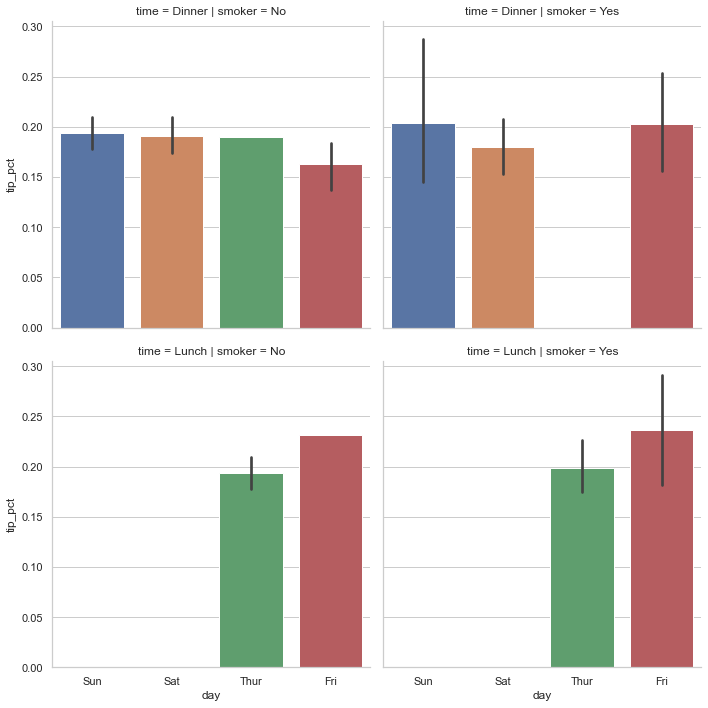

In [ ]:
# instead of grouping by 'time ' by different bar colors within facet 
# we can also expand the facet grid by adding one row per time value
sns.catplot(x = 'day', y = 'tip_pct', row = 'time', col = 'smoker',
           kind = 'bar', data = tips[tips.tip_pct < 1])


**carplot** supports other plot type

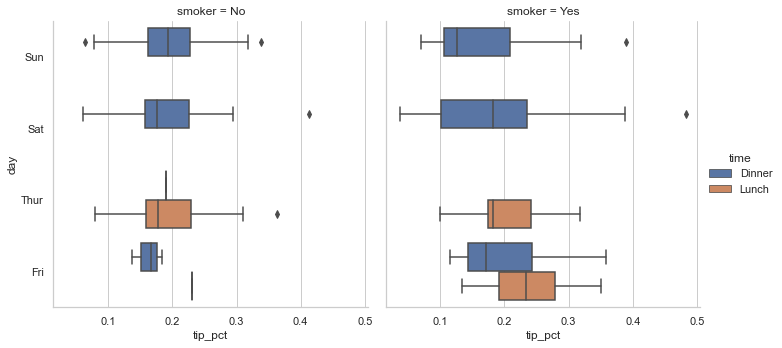

In [ ]:
sns.catplot(x = 'tip_pct', y = 'day', hue = 'time', col = 'smoker',
           kind = 'box', data = tips[tips.tip_pct < 0.5])